## Description of Haberman's Survival Dataset.

This dataset is based on the study conducted at University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for brest cancer.

**Dataset:**
* No. of datapoints = 305
* No. of features = 4 (Including the target variable)
* Class label = (1 or 2)
    *  1 = the patient survived 5 years or longer
    *  2 = the patient died within 5 year

In [1]:
#Import the required libarabires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #To turn off 'FutureWarning'
%matplotlib inline

In [2]:
# Assign 'df' as the dataframe of Haberman's Dataset.
df = pd.read_csv('F:/Data/haberman.csv')

In [3]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [4]:
# Change column labels:
df.columns =['Age', 'operation_Year', 'axil_nodes', 'survival_status']
print(df.columns)

Index(['Age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')


### High level statistics of the dataset

In [5]:
# Number of data points and features in the dataset.
print(df.shape)

(305, 4)


In [6]:
# Number of classes.
print(df['survival_status'].nunique())

2


In [7]:
# Data-points per class label.
df['survival_status'].value_counts()

1    224
2     81
Name: survival_status, dtype: int64

In [8]:
df.describe()

,Age,operation_Year,axil_nodes,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Observations:**
- The dataset is imbalanced.
- The dataset is based on the surgeries conducted from 1958 to 1969.
- 75% of the patients have less than or equall to 4 positive lymph nodes.
- Maximum age of the patients is 83 years and minimum age is 30.

## <ins> Objective: </ins>  
**Classification of given patient into class of may die within 5 yrs or survive given all 3 features.**

### 1. Univariate Analysis of features:

**1.1 CDF-PDF**

----------------Axil nodes----------------


pdf:	 [0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]


cdf: 	 [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


----------------Age----------------


pdf:	 [0.01967213 0.0557377  0.06229508 0.12131148 0.08852459 0.1147541
 0.12459016 0.1147541  0.07540984 0.09836066 0.04262295 0.05245902
 0.01639344 0.00983607 0.00327869]


cdf: 	 [30.         33.53333333 37.06666667 40.6        44.13333333 47.66666667
 51.2        54.73333333 58.26666667 61.8        65.33333333 68.86666667
 72.4        75.93333333 79.46666667 83.        ]




----------------Year of Operation----------------


pdf:	 [0.11803279 0.08852459 0.09180328 0.         0.0852459  0.07540984
 0.09836066 0.         0.09836066 0.09180328 0.09180328 0.
 0.08196721 0.04262295 0.03606557]


cdf: 	 [58.         58.73333333 59.46666667 60.2        60.93333333 61.66666667
 62.4        63.13333333 63.86666667 64.6     

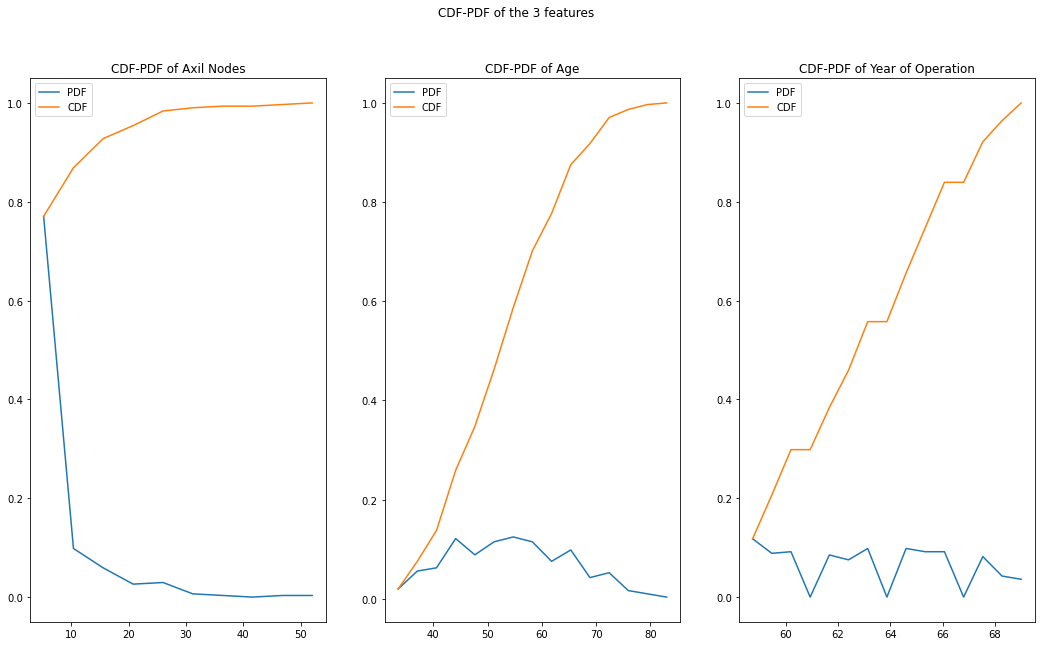

In [9]:
#1.1.1 Plots of CDF-PDF of the 3 features.
fig, ax = plt.subplots(1, 3, figsize=(18,10))
fig.suptitle('CDF-PDF of the 3 features')

counts, bin_edges = np.histogram(df['axil_nodes'], bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print("----------------Axil nodes----------------")
print('\n')
print(f'pdf:\t {pdf}')
print('\n')
print(f'cdf: \t {bin_edges}')
print("\n")

ax[0].plot(bin_edges[1:], pdf)
ax[0].plot(bin_edges[1:], cdf)
ax[0].set_title('CDF-PDF of Axil Nodes')
ax[0].legend(['PDF','CDF'])

#1.1.2 CDF-PDF of Age of patient at the time of operation (Age).
counts, bin_edges = np.histogram(df['Age'], bins=15,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print("----------------Age----------------")
print('\n')
print(f'pdf:\t {pdf}')
print('\n')
print(f'cdf: \t {bin_edges}')
print("\n")
ax[1].plot(bin_edges[1:], pdf)
ax[1].plot(bin_edges[1:], cdf)
ax[1].set_title('CDF-PDF of Age')
ax[1].legend(['PDF','CDF'])

#1.1.3 CDF-PDF of Patient's year of operation (Year_of_Operation).
counts, bin_edges = np.histogram(df['operation_Year'], bins=15,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print("\n")
print("----------------Year of Operation----------------")
print('\n')
print(f'pdf:\t {pdf}')
print('\n')
print(f'cdf: \t {bin_edges}')
print("\n")

ax[2].plot(bin_edges[1:], pdf)
ax[2].plot(bin_edges[1:], cdf)
ax[2].set_title('CDF-PDF of Year of Operation')
ax[2].legend(['PDF','CDF'])
plt.show()

**Observations:**
   
- Almost 80% of the patients have less than 5 positive lymph nodes.

**1.2Distribution Plot**

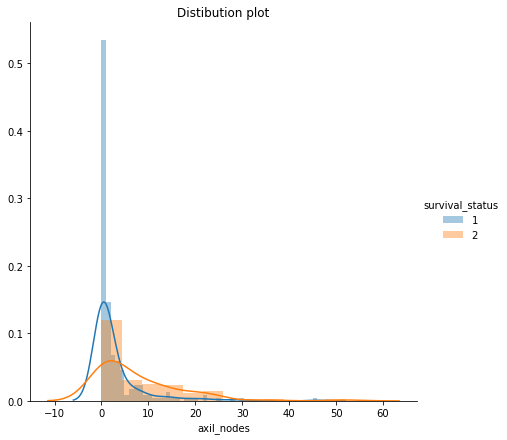

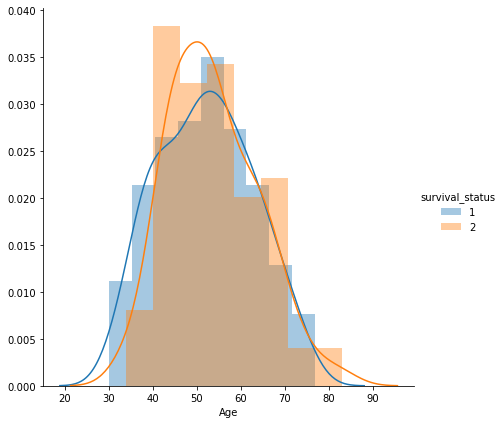

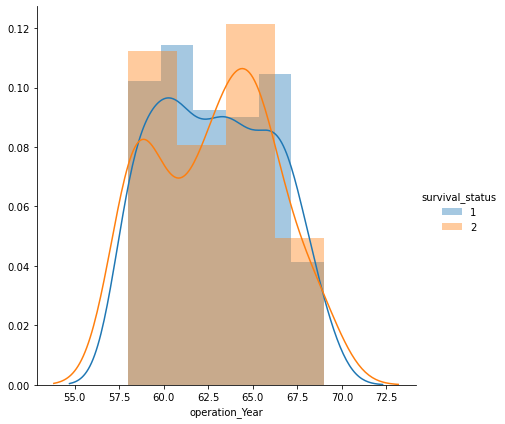

In [10]:
#1.2.1 Distribution plot on Number of nodes.
g=sns.FacetGrid(df,hue='survival_status', height=6)
g.map(sns.distplot, 'axil_nodes').add_legend()
plt.title('Distibution plot')
plt.show()

#1.2.2 Distribution plot on Age.
g=sns.FacetGrid(df,hue='survival_status', height=6)
g.map(sns.distplot, 'Age').add_legend()
plt.show()

#1.2.3 Distribution plot on Year of operation.
g=sns.FacetGrid(df,hue='survival_status', height=6)
g.map(sns.distplot, 'operation_Year').add_legend()
plt.show()

**Observations:**

- The patients with 0 to 5 positive lymph node had high chance of survival.
- Patients between an age of 30 and 40 survived
- Most patients who did not survive had undergone surgery between the year 63 and 66.
- And most patients who survived had undergone surgery between the year 60 and 61.

**1.3 Boxplot**

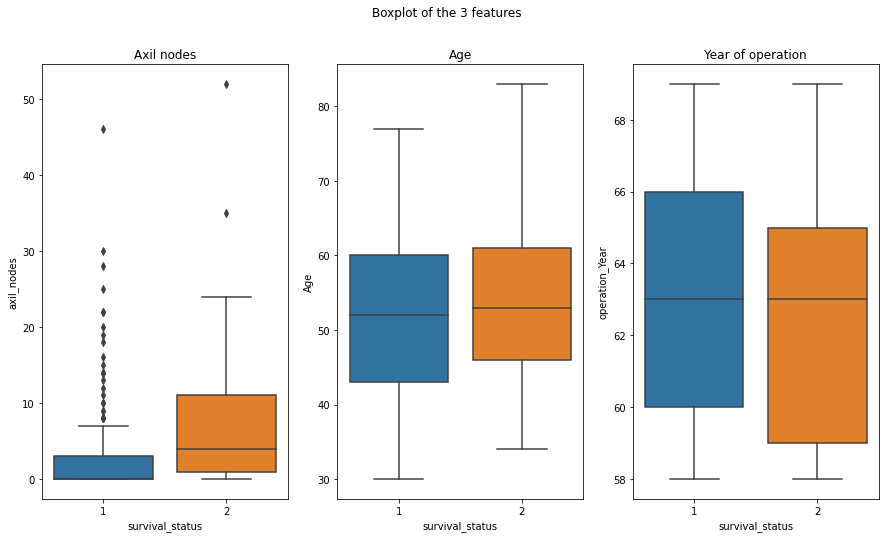

In [11]:
#1.3 Boxplots of the 3 features.
fig, ax = plt.subplots(1, 3, figsize=(15,8))
fig.suptitle('Boxplot of the 3 features')

#1.3.1 Boxplot of Number of nodes
sns.boxplot(ax=ax[0], x='survival_status', y='axil_nodes', data=df)
ax[0].set_title('Axil nodes')

#1.3.2 Boxplot of Age.
sns.boxplot(ax=ax[1], x='survival_status', y='Age', data=df)
ax[1].set_title('Age')

#1.3.3 Boxplot of Year of operation.
sns.boxplot(ax=ax[2], x='survival_status', y='operation_Year', data=df)
ax[2].set_title('Year of operation')
plt.show()

**Observations:**

- Patients with age greater than 76 did not survive.
- Patients with age less than 35 survived after the treatment.
- Patients treated before 1960 have less chance of survival and the patients who are treated after 1965 have slightly better chance for survival.

**1.4 Violin plots**

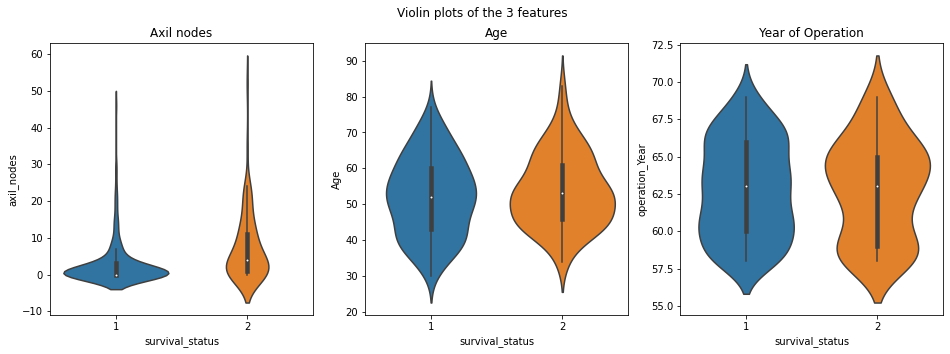

In [12]:
#1.4 Violin pots of the three featres.
fig, ax = plt.subplots(1, 3, figsize=(16,5))
fig.suptitle('Violin plots of the 3 features')

#1.4.1 Violin plot for Number of nodes.
sns.violinplot(ax=ax[0], x='survival_status', y='axil_nodes', data=df)
ax[0].set_title('Axil nodes')

#1.4.2 Violin plot for Age.
sns.violinplot(ax=ax[1], x='survival_status', y='Age', data=df)
ax[1].set_title('Age')

#1.4.3 Violn plot for Year of operation.
sns.violinplot(ax = ax[2], x='survival_status', y='operation_Year', data=df)
ax[2].set_title('Year of Operation')
plt.show()

**Observations:**

- Patients with less than 5 positive lymph nodes has high chance of survival because the density is high between 0 and 5.

### 2. Bi-variate Analysis

### 2.1 Scatterplot

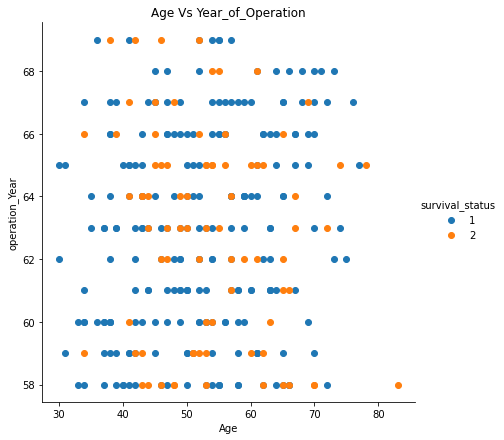

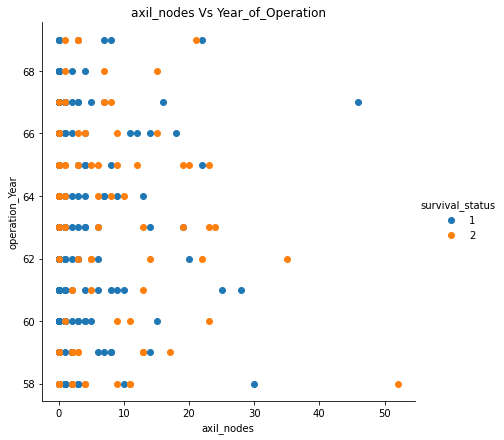

In [13]:
#2.1.1 Scatterplot between Age and Year_of_Operation.
g = sns.FacetGrid(df, hue="survival_status", height =6)
g.map(plt.scatter, "Age", "operation_Year").add_legend();
plt.title('Age Vs Year_of_Operation')
plt.show()

#2.1.2 Scatterplot between Number_of_nodes and Year_of_Operation.
g = sns.FacetGrid(df, hue="survival_status", height =6)
g.map(plt.scatter,"axil_nodes", "operation_Year").add_legend();
plt.title('axil_nodes Vs Year_of_Operation')
plt.show()

**Observations:**

- From the above scatterplot we cannot seperate the class labels using the features age and year of operation.

### 2.2 Pairplot

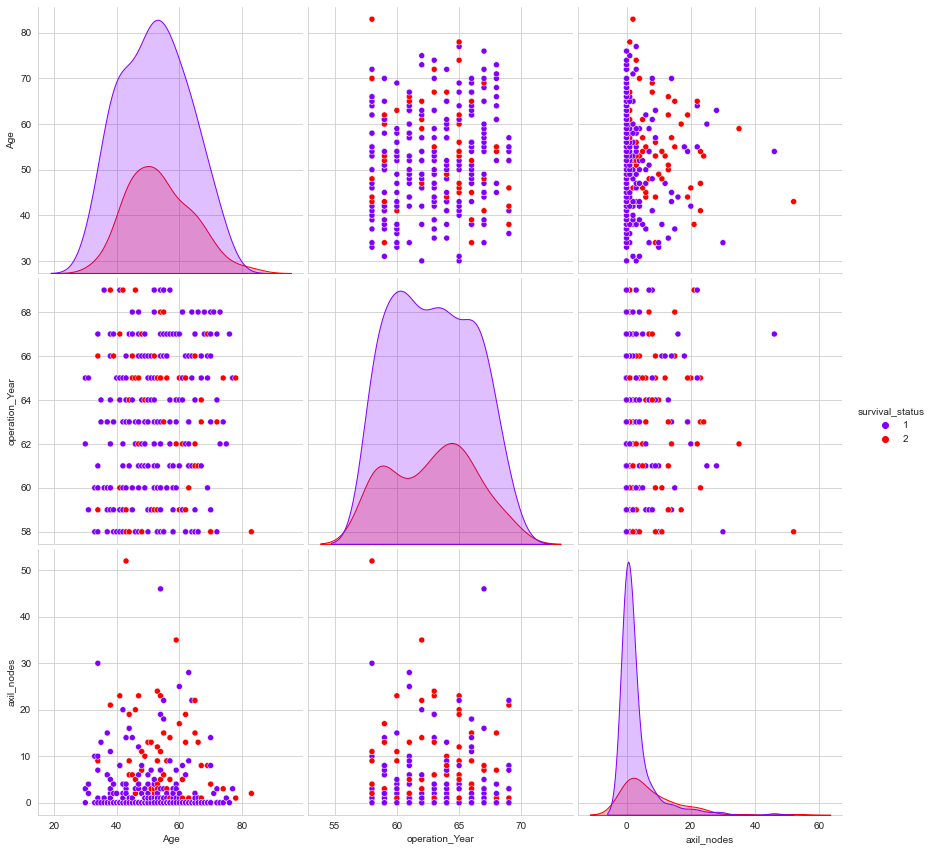

In [14]:
#2.2 Pairplot
sns.set_style("whitegrid")
sns.pairplot(df, hue='survival_status', height =4, palette="rainbow")
plt.show()

**Observations:**

- From the above pairplot it is clear the calss labels are not linearly sperable in 2-D.

## <ins> **Conclusion:** </ins>

The dataset is very small and imbalanced with no missing value. In the brest cancer surgeries conducted from 1958 to 1969, almost 80% of the patients have less than 5 positive lymph nodes. The patients whose age is greater than 76 did not survive and patients whose age is less than 35 survived after the treatment. From the univariate and bi-variate analysis of data we can conclude that calsses are not linearly sperable in a two dimensional plane.

### *Reference:*
- Subplots: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html